In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train=np.genfromtxt('mnist_train.csv',delimiter=',')   #cargando datos de entrenamiento
train    #la primer componente indica la etiqueta y el resto son los pixeles de la imagen

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [54]:
import pickle
t=pickle.load(open('prueba\datos_particionados.pickle', 'rb'))#cargando la lista de particiones
for i in range(len(t)):
    t[i]=t[i].astype(int)
###todo lo que esta en t son diferentes tama\~nos del conjunto de entrenamiento

In [81]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

datos=train[:,1:][t[0]] #se toman solo los pixeles de las imagenes, '[t[0]]' solo indica un tama\~no del conjunto de 
                        #datos
labes=train[:,0][t[0]]  #se toman solo las etiquetas de cada imagen, '[t[0]]' solo indica un tama\~no del conjunto de 
                        #datos
estimador=KMeans(init='k-means++', n_clusters=10, n_init=10)  #algoritmo de agrupamiento KMeans, indicando el solver,
                                                                #numero de custer en este caso 10 por los diez digitos
estimador.fit(datos)    #generando los grupos a partir solo de los pixeles de las imagenes

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
estimador.labels_      #cluster al que corresponde cada una de las imagenes

array([0, 6, 2, ..., 0, 6, 6])

In [74]:
#diferentes metricas que existen
from sklearn import metrics
print('homogeneity_score= ',metrics.homogeneity_score(labes, estimador.labels_))
print('completeness_score= ',metrics.completeness_score(labes, estimador.labels_))
print('v_measure_score= ',metrics.v_measure_score(labes, estimador.labels_))
print('adjusted_rand_score= ',metrics.adjusted_rand_score(labes, estimador.labels_))
print('adjusted_mutual_info_score= ',metrics.adjusted_mutual_info_score(labes,  estimador.labels_))
print('silhouette_score= ',metrics.silhouette_score(datos, estimador.labels_,metric='euclidean',sample_size=300))

homogeneity_score=  0.47522023050691214
completeness_score=  0.4824998914823539
v_measure_score=  0.47883239452783305
adjusted_rand_score=  0.3446156616770724
adjusted_mutual_info_score=  0.47367167355592
silhouette_score=  0.05981017546443191


C:\Users\Alan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


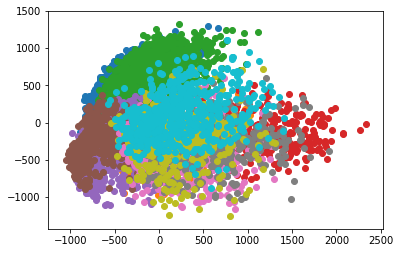

In [89]:
#se aplica un PCA para reducir el numero de atributos a 2
reduced_data = PCA(n_components=2).fit_transform(datos)
#se grafica en forma de dispersion cada uno de los puntos que forman parte de un grupo
for i in np.unique(estimador.labels_):
    plt.scatter(reduced_data[:,0][np.where(estimador.labels_==i)[0]],reduced_data[:,1][np.where(estimador.labels_==i)[0]])
plt.show()